One of Seaborn's main strengths is its ability to easily create visually appealing plots with well-chosen styles and colors. This section covers how to manage these aesthetic elements.

## Seaborn: Controlling Plot Aesthetics

This document covers:

* **Styles:** Using `sns.set_style()` or `sns.set_theme(style=...)` to apply different background and grid styles (`'darkgrid'`, `'whitegrid'`, `'ticks'`, etc.).
* **Color Palettes:** Applying different color schemes using the `palette=` argument in plotting functions or exploring palettes with `sns.color_palette()` and `sns.palplot()`. It covers named palettes, sequential, diverging, and custom palettes.
* **Context:** Scaling plot elements (labels, lines, markers) for different output formats (`'paper'`, `'notebook'`, `'talk'`, `'poster'`) using `sns.set_context()`.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Load the 'tips' dataset
tips_df = sns.load_dataset("tips")

# --- Helper function to create a sample plot ---
# We'll use this function repeatedly to see the effect of different settings
def create_sample_plot(title="Sample Plot"):
    """Creates a sample scatterplot with hue using the tips dataset."""
    plt.figure(figsize=(7, 5)) # Create a new figure for each plot
    ax = sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="day", size="size",
                         sizes=(20, 150), alpha=0.7) # Added size variation
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

#### 1. Seaborn Styles
- Control the overall look (background, grid, spines) using set_theme or set_style.
- Styles include: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

--- Seaborn Styles ---
Plotting with default style...


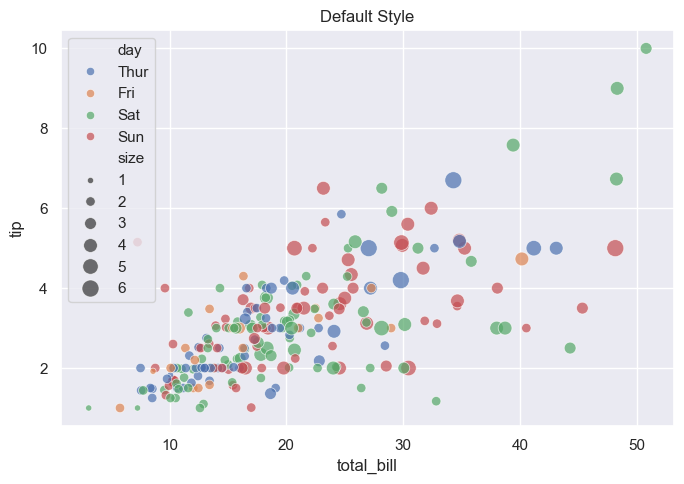

In [6]:
print("--- Seaborn Styles ---")

# a) Default style (often 'darkgrid' if set_theme was used, or Matplotlib default)
print("Plotting with default style...")
create_sample_plot("Default Style")


Plotting with 'whitegrid' style...


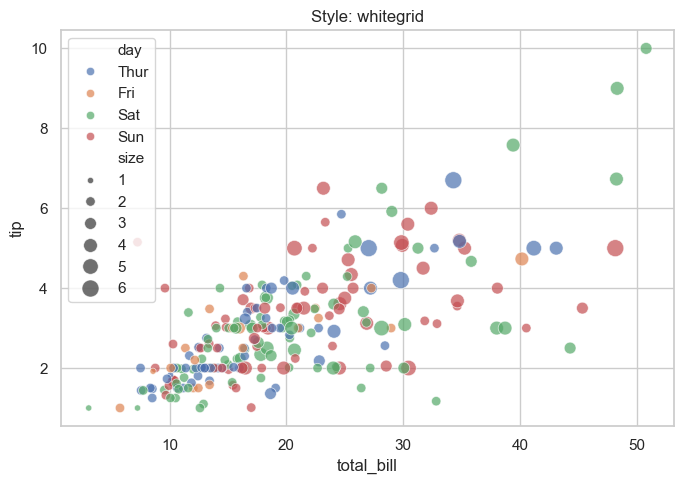


Plotting with 'ticks' style...


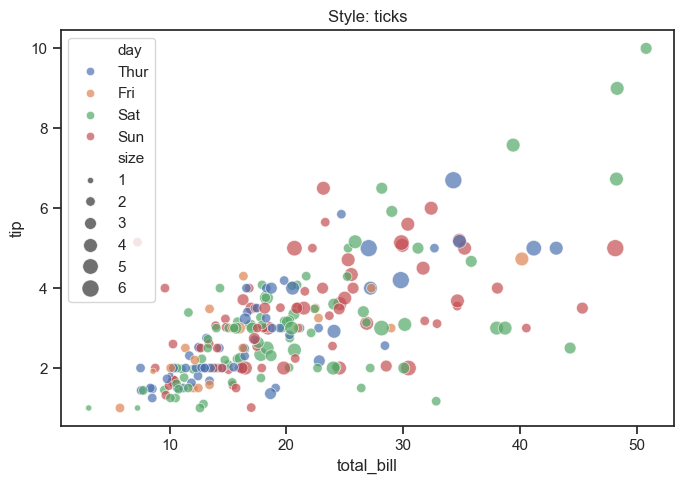

In [7]:
# b) Setting style using sns.set_style()
sns.set_style("whitegrid")
print("\nPlotting with 'whitegrid' style...")
create_sample_plot("Style: whitegrid")

sns.set_style("ticks") # Adds ticks on axes
print("\nPlotting with 'ticks' style...")
create_sample_plot("Style: ticks")
# sns.despine() # Often used with 'white' or 'ticks' to remove top/right spines


Plotting after resetting theme to 'darkgrid'...


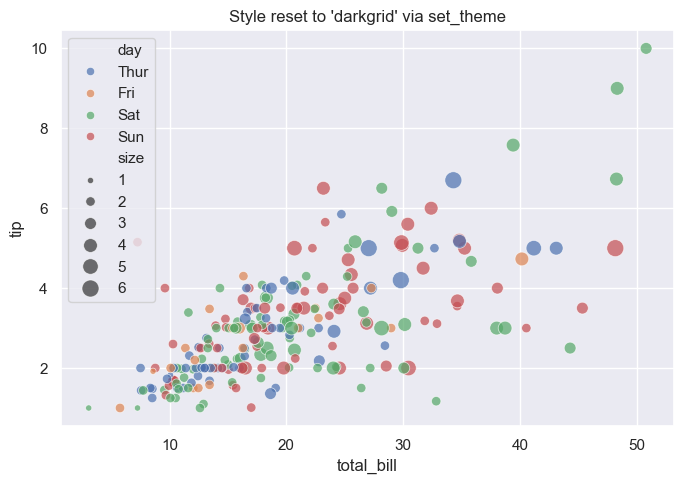

In [8]:
# c) Using sns.set_theme() - More comprehensive, affects more parameters
# Can set style, palette, font, etc. at once. Resets many parameters.
sns.set_theme(style="darkgrid") # Reset to darkgrid for consistency
print("\nPlotting after resetting theme to 'darkgrid'...")
create_sample_plot("Style reset to 'darkgrid' via set_theme")


Plotting temporarily with 'white' style using 'with':


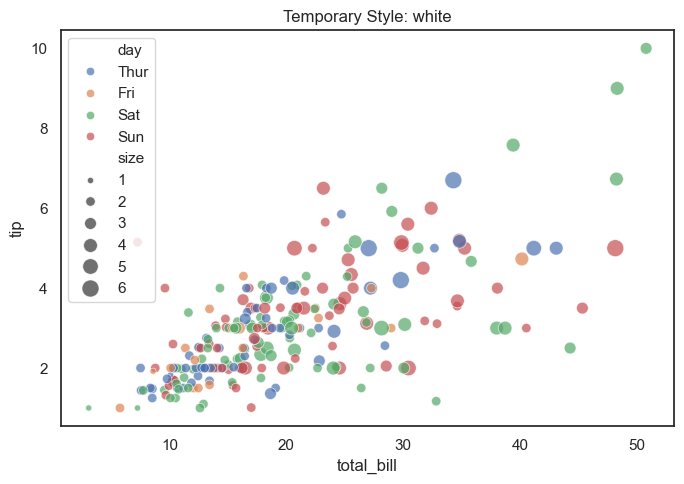


Plotting outside 'with' block (should revert to 'darkgrid'):


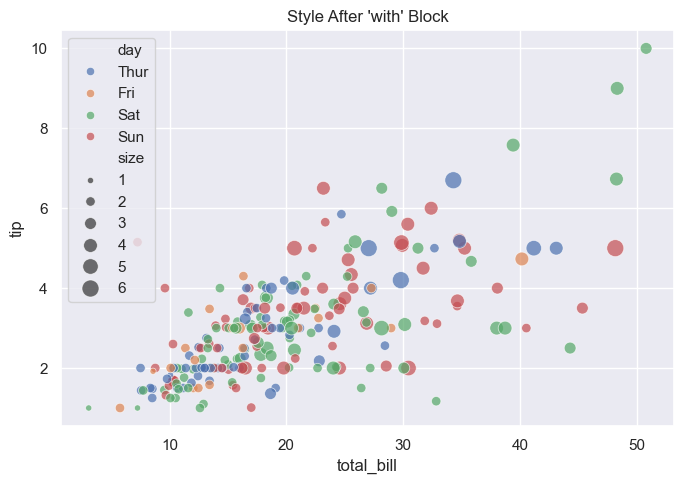

------------------------------


In [9]:
# d) Temporarily setting style using a 'with' block
print("\nPlotting temporarily with 'white' style using 'with':")
with sns.axes_style("white"):
    # Plot created inside the 'with' block uses the temporary style
    create_sample_plot("Temporary Style: white")

print("\nPlotting outside 'with' block (should revert to 'darkgrid'):")
create_sample_plot("Style After 'with' Block") # Style reverts automatically
print("-" * 30)

#### 2. Color Palettes
- Control the colors used in plots, especially when mapping `hue`.

--- Color Palettes ---
Plotting with default palette (style='ticks')...


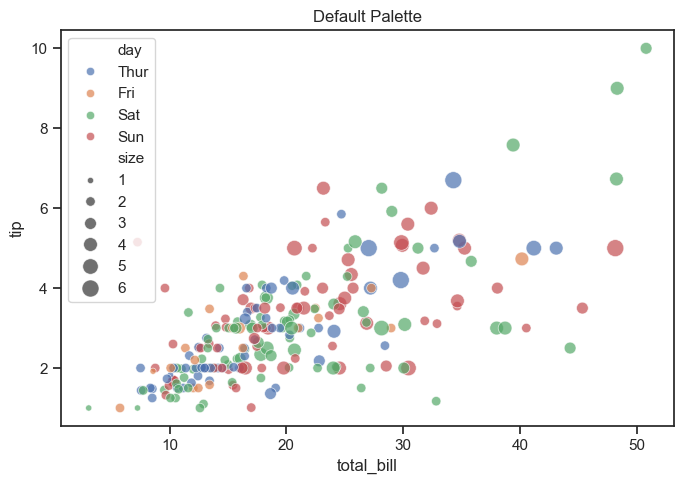

In [10]:
print("--- Color Palettes ---")

# a) Default palette (depends on theme, often 'tab10')
sns.set_theme(style="ticks") # Use ticks style for clearer palette view
print("Plotting with default palette (style='ticks')...")
create_sample_plot("Default Palette")


Plotting with 'colorblind' palette...


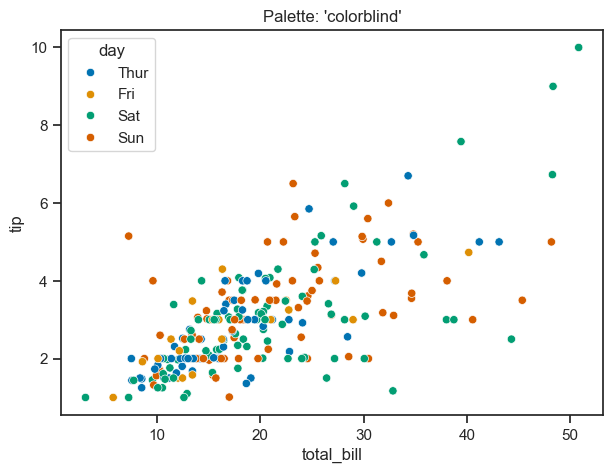

In [11]:
# b) Specifying a palette by name in the plot function
# Examples: 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind'
# Sequential: 'viridis', 'plasma', 'magma', 'Blues', 'Greens'
# Diverging: 'coolwarm', 'RdBu', 'PiYG'
print("\nPlotting with 'colorblind' palette...")
plt.figure(figsize=(7, 5))
sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="day", palette="colorblind")
plt.title("Palette: 'colorblind'")
plt.show()


Plotting with 'viridis' sequential palette (mapping hue to size for demo)...


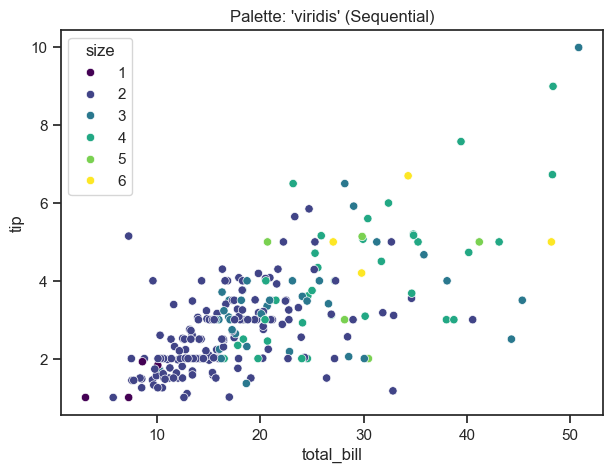

In [12]:
print("\nPlotting with 'viridis' sequential palette (mapping hue to size for demo)...")
plt.figure(figsize=(7, 5))
# Using size for hue mapping here just to show palette effect on a continuous variable
sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="size", palette="viridis")
plt.title("Palette: 'viridis' (Sequential)")
plt.show()


Plotting with custom hex code palette...


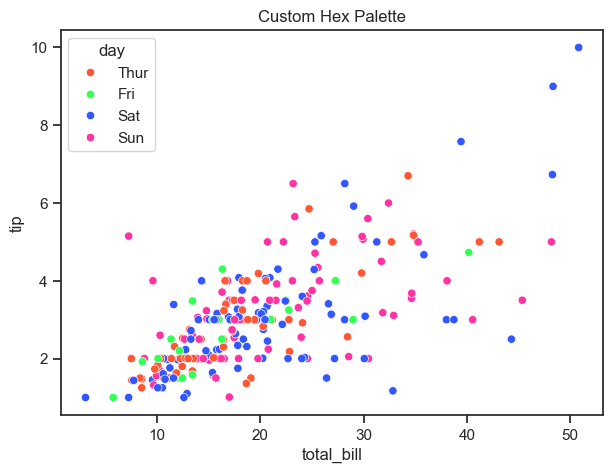

In [13]:
# c) Creating custom palettes with sns.color_palette()
custom_palette = sns.color_palette(['#FF5733', '#33FF57', '#3357FF', '#FF33A1']) # List of hex codes
print("\nPlotting with custom hex code palette...")
plt.figure(figsize=(7, 5))
sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="day", palette=custom_palette)
plt.title("Custom Hex Palette")
plt.show()


Plotting with HUSL palette...


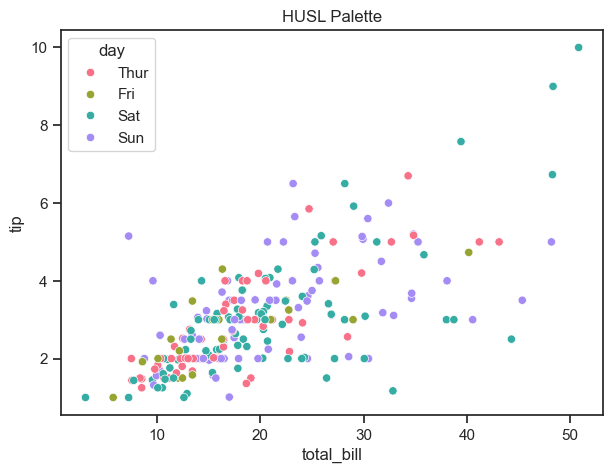

In [14]:
# Using HUSL color system for perceptually uniform brightness/saturation
husl_palette = sns.color_palette("husl", 4) # Generate 4 HUSL colors
print("\nPlotting with HUSL palette...")
plt.figure(figsize=(7, 5))
sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="day", palette=husl_palette)
plt.title("HUSL Palette")
plt.show()


Visualizing palettes with sns.palplot():


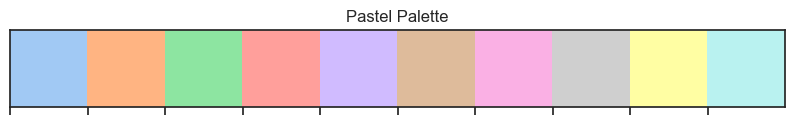

In [15]:
# d) Viewing palettes with sns.palplot()
print("\nVisualizing palettes with sns.palplot():")
sns.palplot(sns.color_palette("pastel"))
plt.title("Pastel Palette")
plt.show()

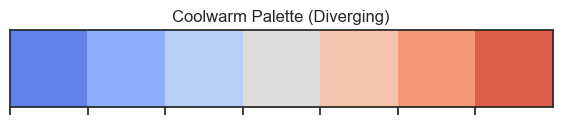

In [16]:
sns.palplot(sns.color_palette("coolwarm", 7)) # Diverging palette with 7 colors
plt.title("Coolwarm Palette (Diverging)")
plt.show()

In [17]:
# e) Setting the default palette globally (less common than per-plot)
# sns.set_palette("muted")
# create_sample_plot("Globally Set Palette: muted")
# sns.set_theme() # Reset theme to defaults if needed
print("-" * 30)

------------------------------


#### 3. Scaling Plot Elements (Context)
- Adjusts sizes of labels, lines, markers for different output media.
- Contexts: 'paper', 'notebook' (default), 'talk', 'poster'

--- Scaling Plot Elements (Context) ---
Plotting with default 'notebook' context...


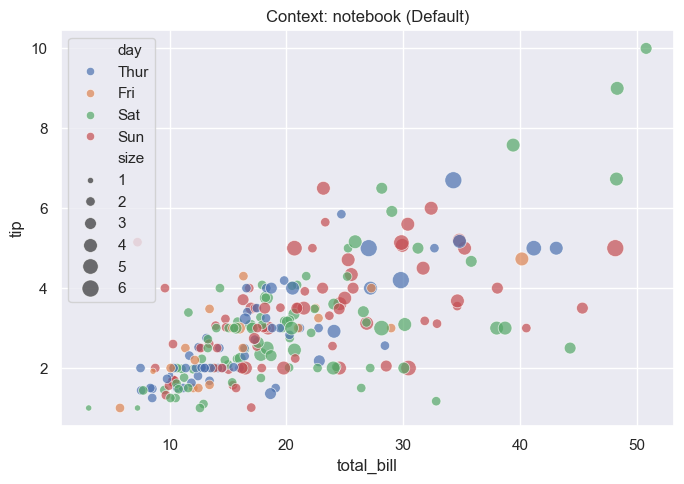

In [18]:
print("--- Scaling Plot Elements (Context) ---")
sns.set_theme(style="darkgrid") # Reset theme

# a) Default context ('notebook')
print("Plotting with default 'notebook' context...")
create_sample_plot("Context: notebook (Default)")


Plotting with 'paper' context...


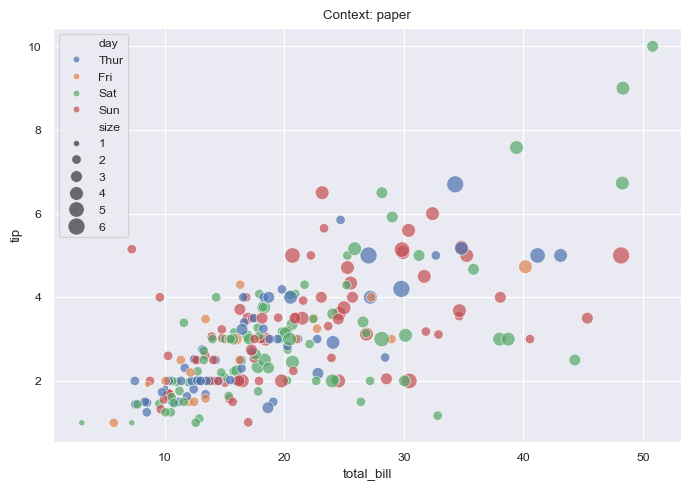


Plotting with 'talk' context...


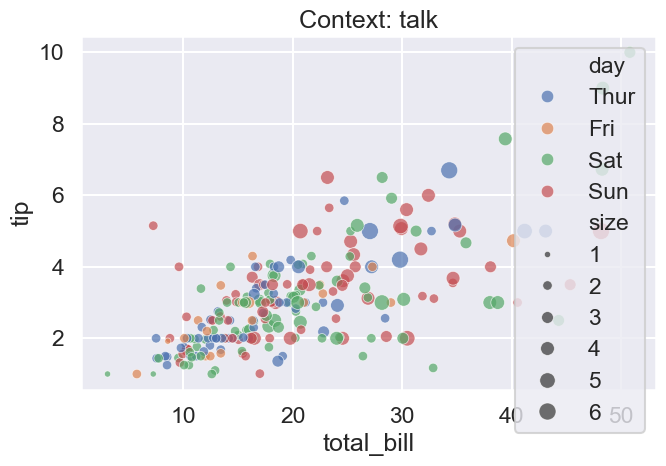

In [19]:
# b) Setting context globally using sns.set_context()
sns.set_context("paper") # Smaller elements suitable for papers
print("\nPlotting with 'paper' context...")
create_sample_plot("Context: paper")

sns.set_context("talk") # Larger elements suitable for talks
print("\nPlotting with 'talk' context...")
create_sample_plot("Context: talk")


Plotting with 'poster' context (larger font, thicker lines)...


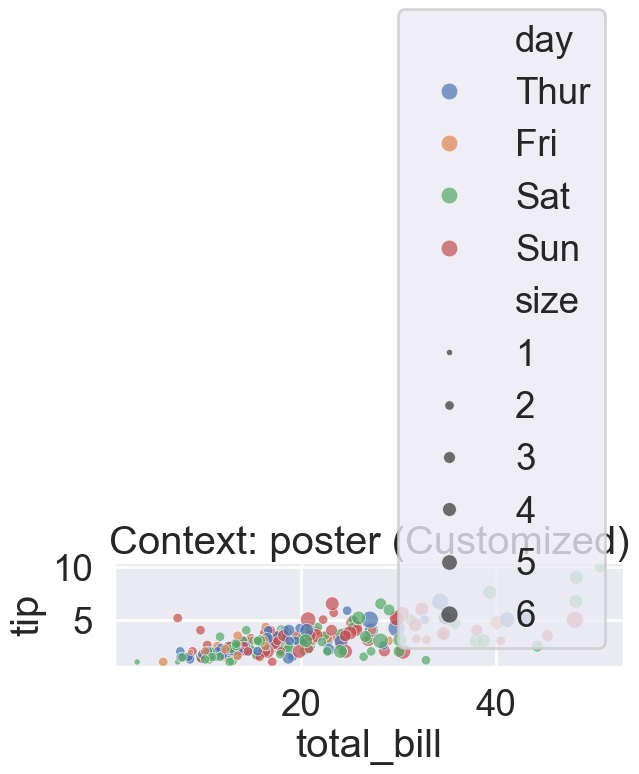

In [20]:
# Can also adjust font_scale and rc parameters within set_context
sns.set_context("poster", font_scale=1.2, rc={"lines.linewidth": 3})
print("\nPlotting with 'poster' context (larger font, thicker lines)...")
create_sample_plot("Context: poster (Customized)")


Plotting temporarily with 'paper' context using 'with':


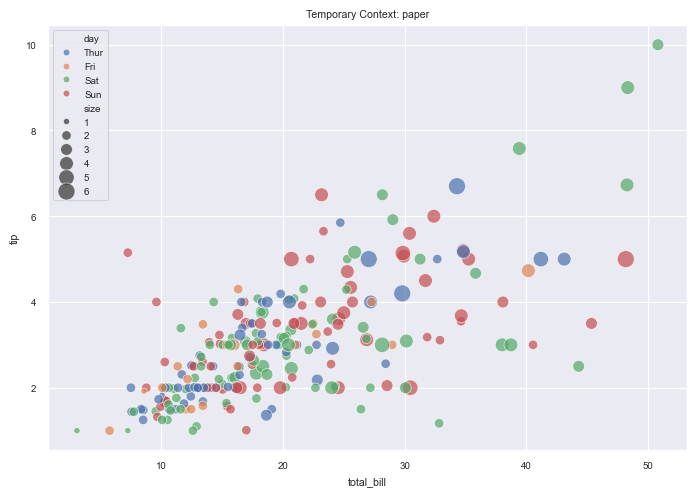


Plotting outside 'with' block (should revert to 'notebook'):


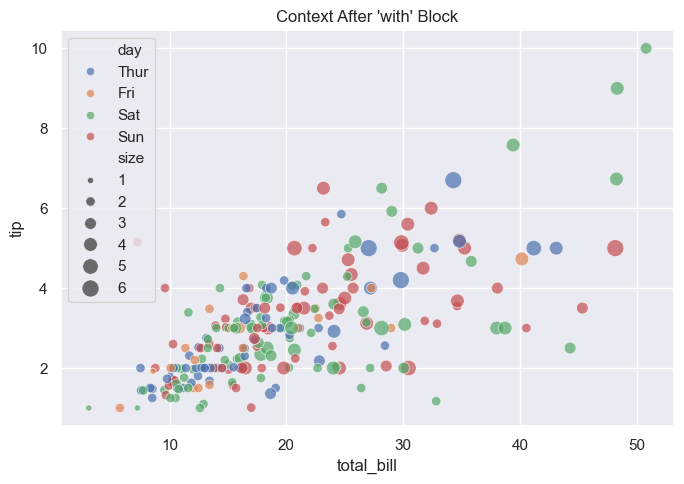

------------------------------


In [21]:
# c) Temporarily setting context using 'with' block
sns.set_context("notebook") # Reset context
print("\nPlotting temporarily with 'paper' context using 'with':")
with sns.plotting_context("paper", font_scale=0.8):
    create_sample_plot("Temporary Context: paper")

print("\nPlotting outside 'with' block (should revert to 'notebook'):")
create_sample_plot("Context After 'with' Block") # Context reverts

# Reset to default theme settings
sns.set_theme()
print("-" * 30)